In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import tellurium as te
import os
import pickle
import test_dict

def load_file(file_loc: str):
    '''
    Function to load file either json or pickled .txt
    ---------------------------------------------------
    Parameter:
    file_loc: str path to file
    ---------------------------------------------------
    returns:
    data: either unpickled tuple or list 
    '''
    if file_loc.endswith('.txt'):
            with open(file_loc, 'rb') as g:
                # data = tuple with [0]=score, [1]=parameter_dict
                data = pickle.loads(g.read())
    else:
        with open(file_loc, 'r') as g:
            # data = list with [0]=score, [1]=parameter_dict
            data = json.loads(g.read())

    return data

def get_best_scoring_parameter_sets(d_path, n_sets):
    '''
    Description: function to find the best scoring parameter set for specified model
    -----------
    Parameter:
    d_path: pathway to directory with parameter sets
    n_sets: number of best sets 
    ----------
    returns:
    dresults: pd.DataFrame() with best score as name and parameter names as index
    '''
    files = os.listdir(d_path)
    files = [file for file in files if 'whole_paras' in file]
    
    dresults = pd.DataFrame()
    for file in files:
        filename = file
        path = d_path
        
        data = load_file(path+filename)
        # add score to dict for later use
        #data[1]['score'] = data[0]
        dnew = pd.DataFrame.from_dict(data[1], orient='index',columns=['Value'])
        # dataframe with each colume parameter set of estimation and name = score 
        dresults[str(data[0])] = dnew['Value']
    # sort the colums names to find lowest estimation score   
    results = sorted(list(map(float, dresults.columns.to_list())))
    results = np.asarray(results,dtype=str)
        
    return dresults[results[:min(len(results),n_sets)]]

In [5]:
parameters = ['vmax_R02055', 'km_Phosphatidylserine_R02055', 'vmax_R02037',
       'km_Ethanolamine_phosphate_R02037', 'vmax_EtOHamine_in',
       'km_External_Ethanolamine_EtOHamine_in', 'vmax_L_Serine_in',
       'km_External_L_Serine_L_Serine_in', 'vmax_Choline_in',
       'km_External_Choline_Choline_in', 'vmax_R01800', 'km_L_Serine_R01800',
       'vmax_R01468', 'km_Ethanolamine_R01468', 'vmax_R01021',
       'km_Choline_R01021', 'vmax_R02038', 'km_Ethanolamine_phosphate_R02038',
       'vmax_R01890', 'km_Choline_phosphate_R01890', 'vmax_R02057',
       'km_CDP_ethanolamine_R02057', 'vmax_R01321', 'km_CDP_choline_R01321',
       'vmax_Serine_to_EtOHamine', 'km_L_Serine_Serine_to_EtOHamine',
       'vmax_PSSbe', 'km_Phosphatidylethanolamine_PSSbe', 'km_L_Serine_PSSbe',
       'k_TransportPC', 'k_TransportPE', 'k_TransportPS',
       'k_SSTransportPC_mem', 'k_SSTransportPE_mem', 'k_SSTransportPS_mem']
stages = ['ring','troph','schizont']
estimations= pd.DataFrame(columns=stages, index=parameters)
file_locs=['CMA_files/ring/',
           'CMA_files/SS_PLModel_MM/',
           'CMA_files/schizont/' ]

for i, file_loc in enumerate(file_locs):
    cols=estimations.columns
    best_set = get_best_scoring_parameter_sets(file_loc, 1)
    estimations[cols[i]] = best_set
                
estimations

,ring,troph,schizont
vmax_R02055,4.423048e-02,1.721549e-01,1.000088e-05
km_Phosphatidylserine_R02055,1.599977e+05,1.263121e+05,3.265689e+04
vmax_R02037,1.377938e-02,3.729675e-03,2.845318e-05
km_Ethanolamine_phosphate_R02037,4.773630e+05,5.020599e+05,8.714480e+05
vmax_EtOHamine_in,2.852157e-04,9.216765e-04,1.341668e-04
km_External_Ethanolamine_EtOHamine_in,6.536975e-05,5.432274e+02,7.389959e+00
vmax_L_Serine_in,1.817119e-04,6.482933e+01,4.194914e+03
km_External_L_Serine_L_Serine_in,1.264021e-10,2.209126e+07,1.159735e+09
vmax_Choline_in,2.398396e-03,1.021118e+00,3.078265e-04
km_External_Choline_Choline_in,8.472974e+04,1.804783e+05,1.582748e-04


In [6]:
estimations['mean'] = estimations[stages].mean(axis=1)
estimations['std'] = estimations[stages].std(axis=1)
estimations['std/mean in %'] = estimations['std']/estimations['mean']*100
estimations['median'] = estimations[stages].median(axis=1)

estimations

,ring,troph,schizont,mean,std,std/mean in %,median
vmax_R02055,4.423048e-02,1.721549e-01,1.000088e-05,7.213179e-02,8.939983e-02,123.939559,4.423048e-02
km_Phosphatidylserine_R02055,1.599977e+05,1.263121e+05,3.265689e+04,1.063222e+05,6.598194e+04,62.058461,1.263121e+05
vmax_R02037,1.377938e-02,3.729675e-03,2.845318e-05,5.845837e-03,7.115521e-03,121.719445,3.729675e-03
km_Ethanolamine_phosphate_R02037,4.773630e+05,5.020599e+05,8.714480e+05,6.169570e+05,2.207414e+05,35.779052,5.020599e+05
vmax_EtOHamine_in,2.852157e-04,9.216765e-04,1.341668e-04,4.470197e-04,4.179453e-04,93.495959,2.852157e-04
km_External_Ethanolamine_EtOHamine_in,6.536975e-05,5.432274e+02,7.389959e+00,1.835392e+02,3.115211e+02,169.730054,7.389959e+00
vmax_L_Serine_in,1.817119e-04,6.482933e+01,4.194914e+03,1.419915e+03,2.403439e+03,169.266435,6.482933e+01
km_External_L_Serine_L_Serine_in,1.264021e-10,2.209126e+07,1.159735e+09,3.939422e+08,6.632883e+08,168.371982,2.209126e+07
vmax_Choline_in,2.398396e-03,1.021118e+00,3.078265e-04,3.412748e-01,5.887625e-01,172.518616,2.398396e-03
km_External_Choline_Choline_in,8.472974e+04,1.804783e+05,1.582748e-04,8.840268e+04,9.029520e+04,102.140792,8.472974e+04


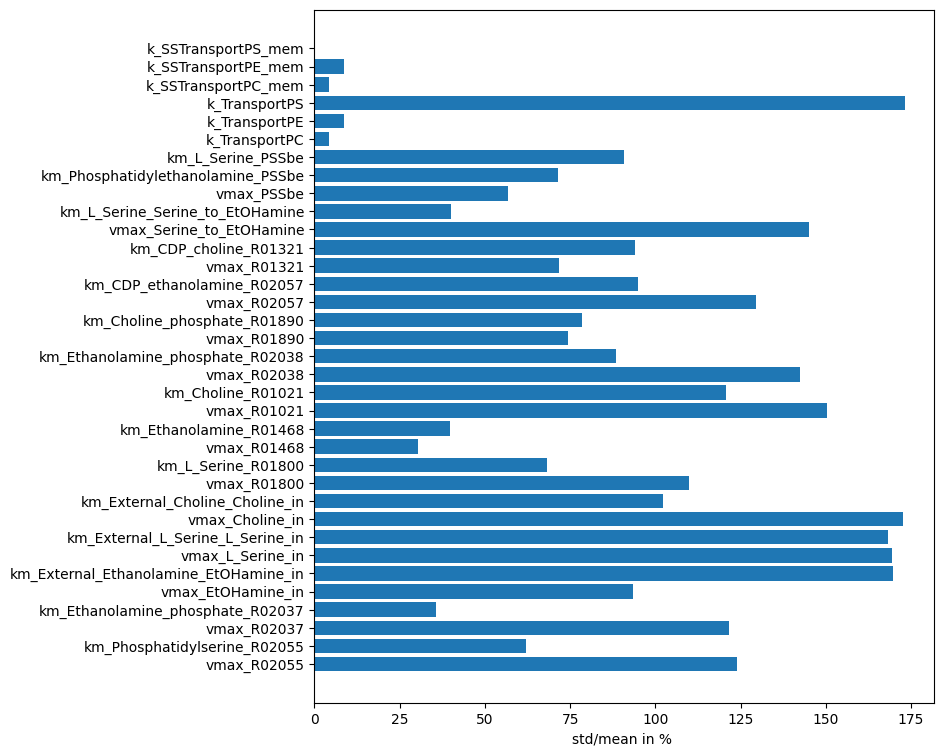

In [11]:
fig, ax = plt.subplots(figsize=(8,9))
values = estimations['std']/estimations['mean']*100
ax.barh(values[:].index,values[:])
ax.set_xlabel('std/mean in % ')
#plt.xticks(rotation=90)
plt.show()

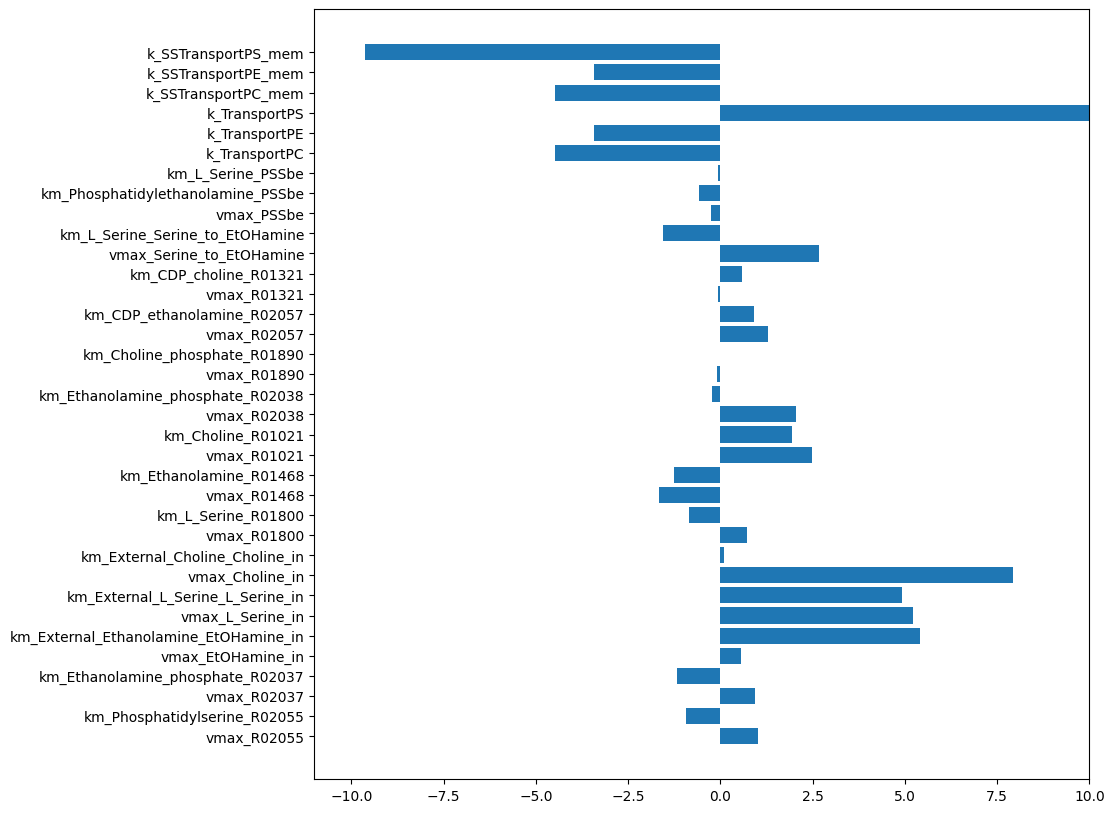

In [173]:
fig, ax = plt.subplots(figsize=(10,10))
values = np.log2(estimations['std']/estimations['median'])
ax.barh(values[:].index,values[:])
ax.set(xlim=[-11,10])

#plt.xticks(rotation=90)
plt.show()

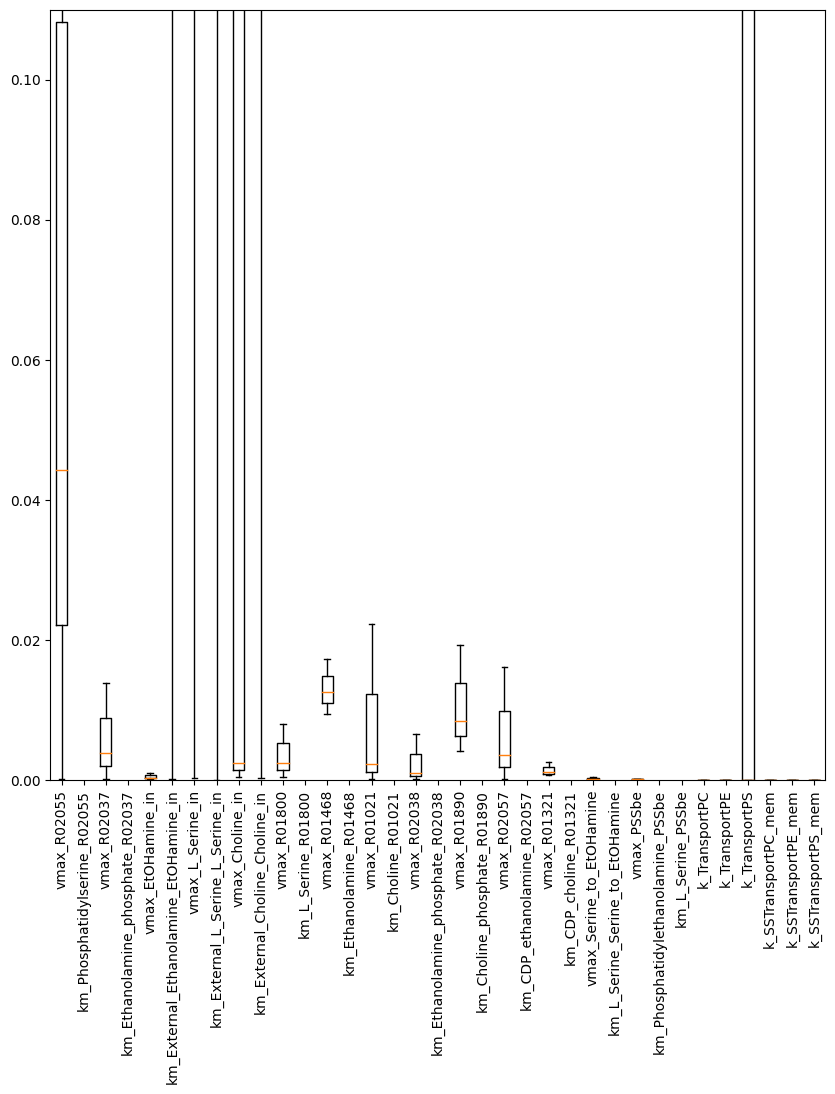

In [160]:
fig, ax = plt.subplots(figsize=(10,10))
values = estimations['std']/estimations['mean']*100
ax.boxplot(estimations[stages].T,labels=values.index)
ax.set(ylim=[0,0.11])
plt.xticks(rotation=90)
plt.show()

### Minimal Score per stage

In [139]:
def metabolomics_test_dict(model, metabolites, timepoints=[]):
    """
    Function to create dict of metabolomics data from literature values
    -----------
    Parameters
    -----------
    model: te.model class
        tellurium model class, used to get species names of the model
    metabolites: pandas.DataFrame
        DataFrame of literature values except Alex Maier
    """
    # Factor to change DataFrame unit[partical number/cell] to [nmol/10^9 cells]
    # alex_factor = 602214.076  # avo/(10^9 cells and 10^9 nmol/mol
    # Translation dict keys=model_names, values=DataFrame_name
    long_name = {
        'Choline': 'avg Cho',
        'L_Serine': 'avg Ser',
        'Phosphatidylethanolamine': 'avg PE',
        'Phosphatidylcholine': 'avg PC'}
    value_dict = {
        'Choline': ['Choline_vo', 'Choline_t14'],
        'L_Serine': ['Serine_t14', 'Serine_vo'],
        'Phosphatidylethanolamine': ['PE_t09', 'PE_t14'],
        'Phosphatidylcholine': ['PC_t14', 'PC_t09']
    }
    # find matching values between dataframe and model
    intersection = list(set(metabolites.index) & set(model.getFloatingSpeciesIds()))
    work_df = metabolites.copy()
    model_names = intersection + [a for a in model.getFloatingSpeciesIds()
                                  if a in long_name]
    new_dict = {}
    stage_dict = {"uninfected": ['uRBC', 'Std.'],        # uninfected
                  "ring": ['uRBC', 'Std.'],                  # ring using unifected data as starting point 
                  "troph": ['Parasite', 'Std..1'],  # trophozoite
                  "schizont": None}                  # schizont
    print(model_names)
    for row in model_names:
        key = row
        if row in value_dict.keys():
            key = value_dict[row]

        new_dict[row] = {'values': [], 'std': []}
        for keys in timepoints:

            if stage_dict[keys] is None:
                new_dict[row]['values'].append([np.nan])
                new_dict[row]['std'].append([np.nan])

            else:
                values = work_df.loc[key, stage_dict[keys][0]].astype('float').tolist()
                stds = work_df.loc[key, stage_dict[keys][1]].tolist()
                # test whether if values is float, if true make a list
                if type(values) == float:
                    values = [values]
                    stds = [stds]

                new_dict[row]['values'].append(values)
                new_dict[row]['std'].append(stds)

    # parasite_vol = np.array([4.00**-1 * 1e-3, 26.7**-1 * 1e-3, 26.9**-1 * 1e-3])
    # extract the avs and give proper names
    print(new_dict)
    return new_dict


def mke_test_dict(model, timepoints=["uninfected", "ring", "troph", "schizont"]):
    """
    Function to create test_dict for objective function
    -----------
    Parameters
    -----------
    model: te.model class
        tellurium model class, used to get species names of the model
    maierframe: pd.DataFrame
        DataFrame of experimental data Alex Maier
    metabolites: pandas.DataFrame
        DataFrame of literature values except Alex Maier
    """
    maierframe = pd.read_csv("Datasets/maierframe_muMolar.tsv",
                             sep="\t", index_col=0)  # maier dataset
    metabolites = pd.read_csv("Datasets/metabolites_muMolar.tsv",
                       sep="\t", index_col=0)

    long_name_to_maier = {
        '1,2-Diacyl-sn-glycerol': 'DG',
        'DAG': 'DG',
        'Phosphatidylserine_mem': 'PS',
        'Phosphatidylethanolamine_mem': 'PE',
        'Phosphatidylcholine_mem': 'PC'}

    stage_dict = {"uninfected": ['RBC1', 'RBC2', 'RBC3'],
                  "ring": ['Ring 1', 'Ring 2', 'Ring 3'],
                  "troph": ['Trophozoite 1', 'Trophozoite 2', 'Trophozoite 3'],
                  "schizont": ['Schizont 1', 'Schizont 2', 'Schizont 3']}

    # now we make datadf
    work_df = maierframe.copy()
    work_df = work_df.loc[[long_name_to_maier[a]
                           for a in model.getFloatingSpeciesIds()
                           if a in long_name_to_maier]]
    # todo: clever weighting and such
    # parasite_vol = np.array([4.00**-1 * 1e-3, 26.7**-1 * 1e-3, 26.9**-1 * 1e-3])
    # extract the avs and give proper names
    new_dict = {}
    # todo: clever weighting and such
    maier_to_long_name = {v: k for k, v in long_name_to_maier.items()}
    for row in work_df.index:
        model_name = maier_to_long_name[row]

        new_dict[model_name] = {'values': [], 'std': []}
        for key in timepoints:
            values = work_df.loc[row, stage_dict[key]].tolist()
            stds = [work_df.loc[row, stage_dict[key]].std()] * len(values)

            new_dict[model_name]['values'].append(values)
            new_dict[model_name]['std'].append(stds)

    metas_dict = metabolomics_test_dict(model, metabolites, timepoints)

    new_dict.update(metas_dict)

    return new_dict

In [175]:
modelpath = "model_files/" + 'SS_PLModel_MM' + ".atm"
# load model
model = te.loada(modelpath)
scatter_dics={}
for stage in stages:
    scatter_dics[stage] = mke_test_dict(model, timepoints=[stage])
scatter_dics

['Ethanolamine', 'Ethanolamine_phosphate', 'CDP_ethanolamine', 'CDP_choline', 'Choline_phosphate', 'L_Serine', 'Choline', 'Phosphatidylcholine', 'Phosphatidylethanolamine']
{'Ethanolamine': {'values': [[261.53490307988085]], 'std': [[51.47671108238925]]}, 'Ethanolamine_phosphate': {'values': [[9.382045729532232]], 'std': [[2.241727740684693]]}, 'CDP_ethanolamine': {'values': [[1.500712181958364]], 'std': [[0.3756969639480828]]}, 'CDP_choline': {'values': [[2.6153490307988085]], 'std': [[0.0026153490307988]]}, 'Choline_phosphate': {'values': [[57.081030434100974]], 'std': [[14.986365081243967]]}, 'L_Serine': {'values': [[184.94253860648715, 506.4644154880232]], 'std': [[48.77833509823175, 105.23666338214254]]}, 'Choline': {'values': [[160.03445259887948, 37.56969639480828]], 'std': [[24.9080860076077, 12.495556480483195]]}, 'Phosphatidylcholine': {'values': [[nan, nan]], 'std': [[nan, nan]]}, 'Phosphatidylethanolamine': {'values': [[nan, nan]], 'std': [[nan, nan]]}}
['Ethanolamine', 'Et

{'ring': {'Phosphatidylcholine_mem': {'values': [[56842.50000000001,
     49832.5,
     49652.5]],
   'std': [[4100.174793022045, 4100.174793022045, 4100.174793022045]]},
  'Phosphatidylethanolamine_mem': {'values': [[37777.50000000001,
     27087.5,
     25367.5]],
   'std': [[6723.622535508672, 6723.622535508672, 6723.622535508672]]},
  'Phosphatidylserine_mem': {'values': [[9837.5, 6407.5, 4820.000000000001]],
   'std': [[2564.513030447171, 2564.513030447171, 2564.513030447171]]},
  'Ethanolamine': {'values': [[261.53490307988085]],
   'std': [[51.47671108238925]]},
  'Ethanolamine_phosphate': {'values': [[9.382045729532232]],
   'std': [[2.241727740684693]]},
  'CDP_ethanolamine': {'values': [[1.500712181958364]],
   'std': [[0.3756969639480828]]},
  'CDP_choline': {'values': [[2.6153490307988085]],
   'std': [[0.0026153490307988]]},
  'Choline_phosphate': {'values': [[57.081030434100974]],
   'std': [[14.986365081243967]]},
  'L_Serine': {'values': [[184.94253860648715, 506.464415

In [147]:
def calc_scores(simulation_nums, molecule, data, normalized=True, factor=1e1):

    scores = np.zeros(len(simulation_nums))
    alex_bias_lst = ['DAG', 'Phosphatidylserine_mem',
                     'Phosphatidylethanolamine_mem', 'Phosphatidylcholine_mem']

    if molecule == 'time':
        return None
    for ar_pos, simulation_num in enumerate(simulation_nums):
        dist = 0.

        bias_fac = 1
        if molecule in alex_bias_lst:
            bias_fac = 2
        # iterate through the measured timepoints, thus finer evaluation of fit
        for i, values in enumerate(data[molecule]['values']):
            for pos, value in enumerate(values):
                # data entries empty as no literature value found, thus skipped
                if np.isnan(value):
                    continue
                if normalized:
                    dist += np.nansum(((value
                            - simulation_num)**2  # noqa: E128
                            * bias_fac)  # noqa:E128
                            / data[molecule]['std'][i][pos]**2)   # noqa: E128

                else:
                    dist += np.nansum(bias_fac*(value
                            - simulation_result_dict[molecule][i])**2)  # noqa:E128
        scores[ar_pos] = dist * factor
    return scores

for stage in stages:
    scatter_dic = scatter_dics[stage]
    minArray = np.zeros(len(scatter_dic))
    minArray.fill(np.nan)
    
    for it, mole in enumerate(scatter_dic):
            scatter_amount = np.asarray(scatter_dic[mole]['values']) 
            scatter_std = np.asarray(scatter_dic[mole]['std'])
            
            if np.isnan(float(scatter_amount[0][0])):
                #print('No minimum element for '+ mole +' as no test value given')
                continue
            scatter_scores = calc_scores(scatter_amount[0], mole, scatter_dic)
            #print(scatter_scores)
            
            #plt.errorbar(x=scatter_amount[0], y=scatter_scores,
            #                    xerr=scatter_std[0], fmt='o', color='red')
            
            ar = np.linspace(min(scatter_dic[mole]['values'][0]), max(scatter_dic[mole]['values'][0]), num=1000)
            ar_scores = calc_scores(ar, mole, scatter_dic)
            # Find Minimum
            minElement = np.amin(ar_scores)
            minArray[it]= minElement
            #print('Minimum element from Numpy Array for '+ mole +': ', minElement)
            #result = np.argmin(ar_scores)
            #print(result)
            #plt.plot(ar, ar_scores)

            #plt.legend(['Simulation','exp. Data'])
            #plt.xlabel('Concentration in µmole')
            #plt.ylabel('Cost score')
            #plt.title(mole)
            #plt.show()

    print(minArray)
    print(np.nansum(minArray))
print(scatter_dic.keys())

[ 40.00002094  40.0000048   40.00002962   0.           0.
   0.           0.           0.          76.83645731 193.13097342
          nan          nan]
389.9674860960519
[ 40.0000019   40.00000114  40.00002087   0.           0.
   0.           0.           0.         129.31466967  25.07557139
 123.38722186  40.50959162]
438.2870784538919
[40.0000202  40.00001812 40.00005376         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
120.00009207980855
dict_keys(['Phosphatidylcholine_mem', 'Phosphatidylethanolamine_mem', 'Phosphatidylserine_mem', 'Ethanolamine', 'Ethanolamine_phosphate', 'CDP_ethanolamine', 'CDP_choline', 'Choline_phosphate', 'L_Serine', 'Choline', 'Phosphatidylcholine', 'Phosphatidylethanolamine'])
